In [1]:
#Dataset Sao Paulo Housing Prices

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/sao-paulo-housing-prices/data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
houses = pd.read_csv('/kaggle/input/sao-paulo-housing-prices/data.csv')
houses.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [4]:
houses.shape

(11657, 8)

In [5]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [6]:
houses.nunique()

address     5348
district    1199
area         381
bedrooms       7
garage         7
type           4
rent        1662
total       5571
dtype: int64

In [7]:
houses.type.unique()

array(['Studio e kitnet', 'Apartamento', 'Casa em condomínio', 'Casa'],
      dtype=object)

In [8]:
# Contagem de cada valor único na coluna 'type'
contagem_valores = houses['type'].value_counts()

# Calcular percentual de cada valor único
percentual_valores = contagem_valores / len(houses) * 100

# Exibir os resultados
print(percentual_valores)

type
Apartamento           61.713992
Casa                  24.371622
Studio e kitnet       11.846959
Casa em condomínio     2.067427
Name: count, dtype: float64


In [9]:
houses = houses.drop(columns=['address', 'district'])
houses.head()

,area,bedrooms,garage,type,rent,total
0,21,1,0,Studio e kitnet,2400,2939
1,15,1,1,Studio e kitnet,1030,1345
2,18,1,0,Apartamento,4000,4661
3,56,2,2,Casa em condomínio,1750,1954
4,19,1,0,Studio e kitnet,4000,4654


In [10]:
# Calcular o custo-benefício (total/area) como preço por metro quadrado
houses['custo_beneficio'] = houses['total'] / houses['area']

# Ordenar pelo melhor custo-benefício (menor valor de custo por metro quadrado)
melhor_custo_beneficio = houses.sort_values(by='custo_beneficio')

# Exibir a casa com o melhor custo-benefício
print(melhor_custo_beneficio.head(1))


      area  bedrooms  garage  type  rent  total  custo_beneficio
9657   180         1       0  Casa   800    814         4.522222


In [11]:
# Calcular o custo-benefício como total dividido pelo número de quartos
houses['custo_beneficio'] = houses['total'] / houses['bedrooms']

# Ordenar pelo melhor custo-benefício (menor valor de total por quarto)
melhor_custo_beneficio = houses.sort_values(by='custo_beneficio')

# Exibir a casa com o melhor custo-benefício
print(melhor_custo_beneficio.head(10))


       area  bedrooms  garage                type  rent  total  \
3061     30         2       0                Casa   550    574   
4994     80         3       1                Casa  1000   1042   
5999     80         3       0                Casa  1000   1042   
2274     40         3       0                Casa   900   1063   
10539    67         3       1  Casa em condomínio  1050   1136   
4643     50         2       0                Casa   730    761   
6592     95         3       0                Casa  1100   1147   
3432     35         2       0                Casa   800    814   
10559    70         2       0                Casa   500    821   
4397     30         2       0                Casa   800    834   

       custo_beneficio  
3061        287.000000  
4994        347.333333  
5999        347.333333  
2274        354.333333  
10539       378.666667  
4643        380.500000  
6592        382.333333  
3432        407.000000  
10559       410.500000  
4397        417.000000 

In [12]:
houses['bedroom_and_garage'] = np.where((houses['bedrooms']>0) & (houses['garage']>0), 1, 0)
houses.head()

,area,bedrooms,garage,type,rent,total,custo_beneficio,bedroom_and_garage
0,21,1,0,Studio e kitnet,2400,2939,2939.0,0
1,15,1,1,Studio e kitnet,1030,1345,1345.0,1
2,18,1,0,Apartamento,4000,4661,4661.0,0
3,56,2,2,Casa em condomínio,1750,1954,977.0,1
4,19,1,0,Studio e kitnet,4000,4654,4654.0,0


In [13]:
houses = houses.drop(columns=['custo_beneficio'])
houses.head()

,area,bedrooms,garage,type,rent,total,bedroom_and_garage
0,21,1,0,Studio e kitnet,2400,2939,0
1,15,1,1,Studio e kitnet,1030,1345,1
2,18,1,0,Apartamento,4000,4661,0
3,56,2,2,Casa em condomínio,1750,1954,1
4,19,1,0,Studio e kitnet,4000,4654,0


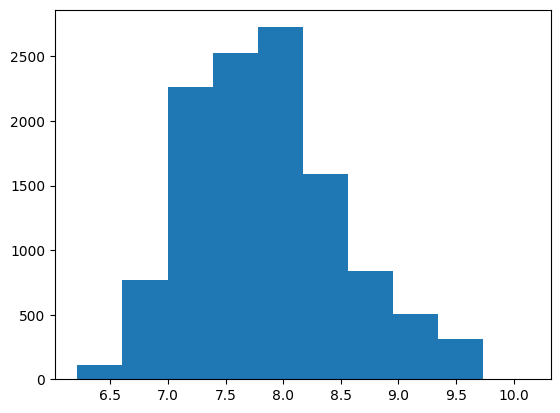

In [14]:
plt.hist(np.log(houses['rent']));

In [15]:
houses['extra_cost'] = houses['total']-houses['rent']

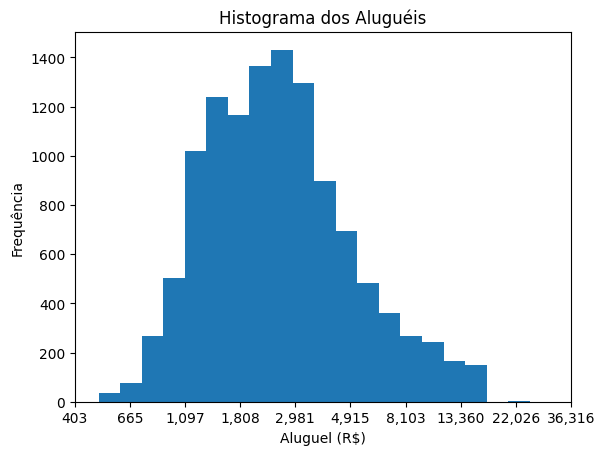

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Gerar histograma dos valores log-transformados
log_rent = np.log(houses['rent'])
plt.hist(log_rent, bins=20)

# Ajustar os rótulos do eixo x para exibir os valores de aluguel originais
# Convertendo os valores do eixo x de volta à escala original usando np.exp
locs, labels = plt.xticks()  # Obter as posições originais dos ticks no eixo x
plt.xticks(locs, [f'{np.exp(x):,.0f}' for x in locs])  # Atualizar os rótulos com os valores de aluguel

# Exibir o gráfico
plt.xlabel('Aluguel (R$)')
plt.ylabel('Frequência')
plt.title('Histograma dos Aluguéis')
plt.show()


# Modelo preditivo

In [17]:
from sklearn.model_selection import train_test_split

X = houses.drop(['rent','total'], axis=1)
y = houses['rent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9325, 6), (2332, 6), (9325,), (2332,))

In [19]:
categorical_features = ['type']
numerical_features = ['area', 'bedrooms', 'garage', 'bedroom_and_garage', 'extra_cost']

In [20]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
X_train_categorical = ohe.fit_transform(X_train[categorical_features])
X_test_categorical = ohe.transform(X_test[categorical_features])

In [21]:
X_train_categorical.toarray()

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [22]:
X_train_processed = pd.concat([pd.DataFrame(X_train_categorical.toarray()), X_train[numerical_features].reset_index()], axis=1)
X_test_processed = pd.concat([pd.DataFrame(X_test_categorical.toarray()), X_test[numerical_features].reset_index()], axis=1)

X_train_processed.shape

(9325, 9)

In [23]:
X_train_processed.head()

,0,1,2,index,area,bedrooms,garage,bedroom_and_garage,extra_cost
0,0.0,0.0,0.0,9000,80,3,1,1,698
1,1.0,0.0,0.0,5378,70,2,0,0,265
2,0.0,1.0,0.0,10605,175,1,0,0,151
3,1.0,0.0,0.0,11396,375,4,4,1,1970
4,0.0,0.0,0.0,6605,60,2,1,1,790


In [24]:
X_train_processed = X_train_processed.drop(columns='index')
X_test_processed = X_test_processed.drop(columns='index')

In [25]:
X_train_processed.head()

,0,1,2,area,bedrooms,garage,bedroom_and_garage,extra_cost
0,0.0,0.0,0.0,80,3,1,1,698
1,1.0,0.0,0.0,70,2,0,0,265
2,0.0,1.0,0.0,175,1,0,0,151
3,1.0,0.0,0.0,375,4,4,1,1970
4,0.0,0.0,0.0,60,2,1,1,790


In [26]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [27]:
xgb = XGBRegressor()

xgb.fit(X_train_processed, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
y_pred = xgb.predict(X_test_processed)

In [29]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2525610.7065990483


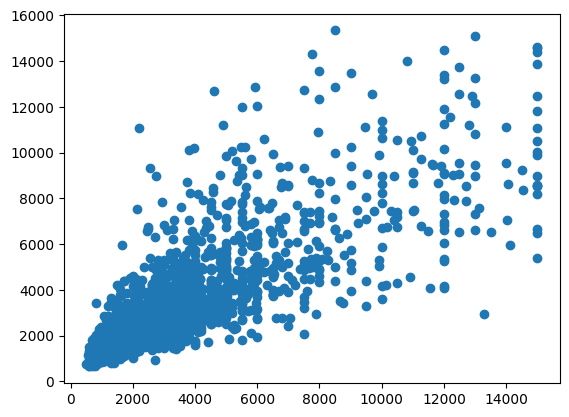

In [30]:
plt.scatter(y_test, y_pred)

In [31]:
X_test_processed

,0,1,2,area,bedrooms,garage,bedroom_and_garage,extra_cost
0,0.0,0.0,0.0,60,2,1,1,947
1,0.0,0.0,0.0,70,2,0,0,682
2,0.0,0.0,0.0,118,2,0,0,1334
3,0.0,0.0,0.0,31,1,1,1,1005
4,0.0,0.0,0.0,70,3,1,1,507
...,...,...,...,...,...,...,...,...
2327,0.0,0.0,0.0,65,2,1,1,1407
2328,0.0,0.0,0.0,50,2,1,1,1002
2329,0.0,0.0,0.0,160,2,1,1,285
2330,0.0,0.0,0.0,48,2,1,1,535


In [32]:
import pandas as pd
import numpy as np

# Supondo que você já tenha o modelo 'xgb' treinado

# Crie um DataFrame com os valores que deseja prever
# Estes são os valores manuais de entrada para as variáveis X
novos_dados = pd.DataFrame({
    0: [0.0],  # coluna 0 Studio
    1: [0.0],  # coluna 1 Casa
    2: [0.0],  # coluna 2 Casa Condominio
    'area': [100],  # valor que você está inserindo manualmente
    'bedrooms': [2],  # valor que você está inserindo manualmente
    'garage': [1],  # valor que você está inserindo manualmente
    'bedroom_and_garage': [1],  # valor que você está inserindo manualmente
    'extra_cost': [500]  # valor que você está inserindo manualmente
})

# Se precisar de processamento, aplique o mesmo processamento que foi aplicado em X_test_processed
# Exemplo: suponha que você tenha feito algum tipo de normalização ou transformação, aplique aqui

# Prever o valor de Y com os novos dados
y_pred = xgb.predict(novos_dados)

# Exibir a predição
print(f'Predição para os novos dados: {y_pred}')




Predição para os novos dados: [3102.0862]
